# **Quick Start** 👩‍💻🚀

**Here, you will learn:**
- What is dlt?
- How to run a simple pipeline with toy data.
- How to explore the loaded data using:
  - DuckDB connection
  - dlt's sql_client
  - dlt datasets

## **What is dlt?**

In today's data-driven world, organizations often grapple with the challenge of efficiently **extracting, transforming,** and **loading** (ETL) data from various, often messy, data sources into well-structured, live datasets. This process can be complex, time-consuming, and prone to errors, especially when dealing with large volumes of data or nested data structures.

Enter **dlt**, an **open-source Python library** designed to simplify and streamline this process. **dlt can load data from** a wide range of **sources** including REST APIs, SQL databases, cloud storage, and Python data structures, among others. It offers a lightweight interface that **infers schemas** and **data types**, **normalizes** the data, and handles **nested data** structures, making it easy to use, flexible, and scalable.

Moreover, dlt supports a variety of **popular destinations** and allows for the addition of custom destinations to create **reverse ETL** pipelines. It can be deployed **anywhere Python runs**, be it on Airflow, serverless functions, or any other cloud deployment of your choice. With features like **schema evolution**, **data contracts** and **incremental loading**, dlt also automates pipeline maintenance, saving valuable time and resources.

In essence, dlt is a powerful tool that simplifies the ETL process, making it more efficient and less error-prone. It allows data teams to **focus** on leveraging the data and driving value, while ensuring effective **governance** through timely notifications of any changes.

[Learn more about dlt here](https://dlthub.com/docs/intro) and in this course!

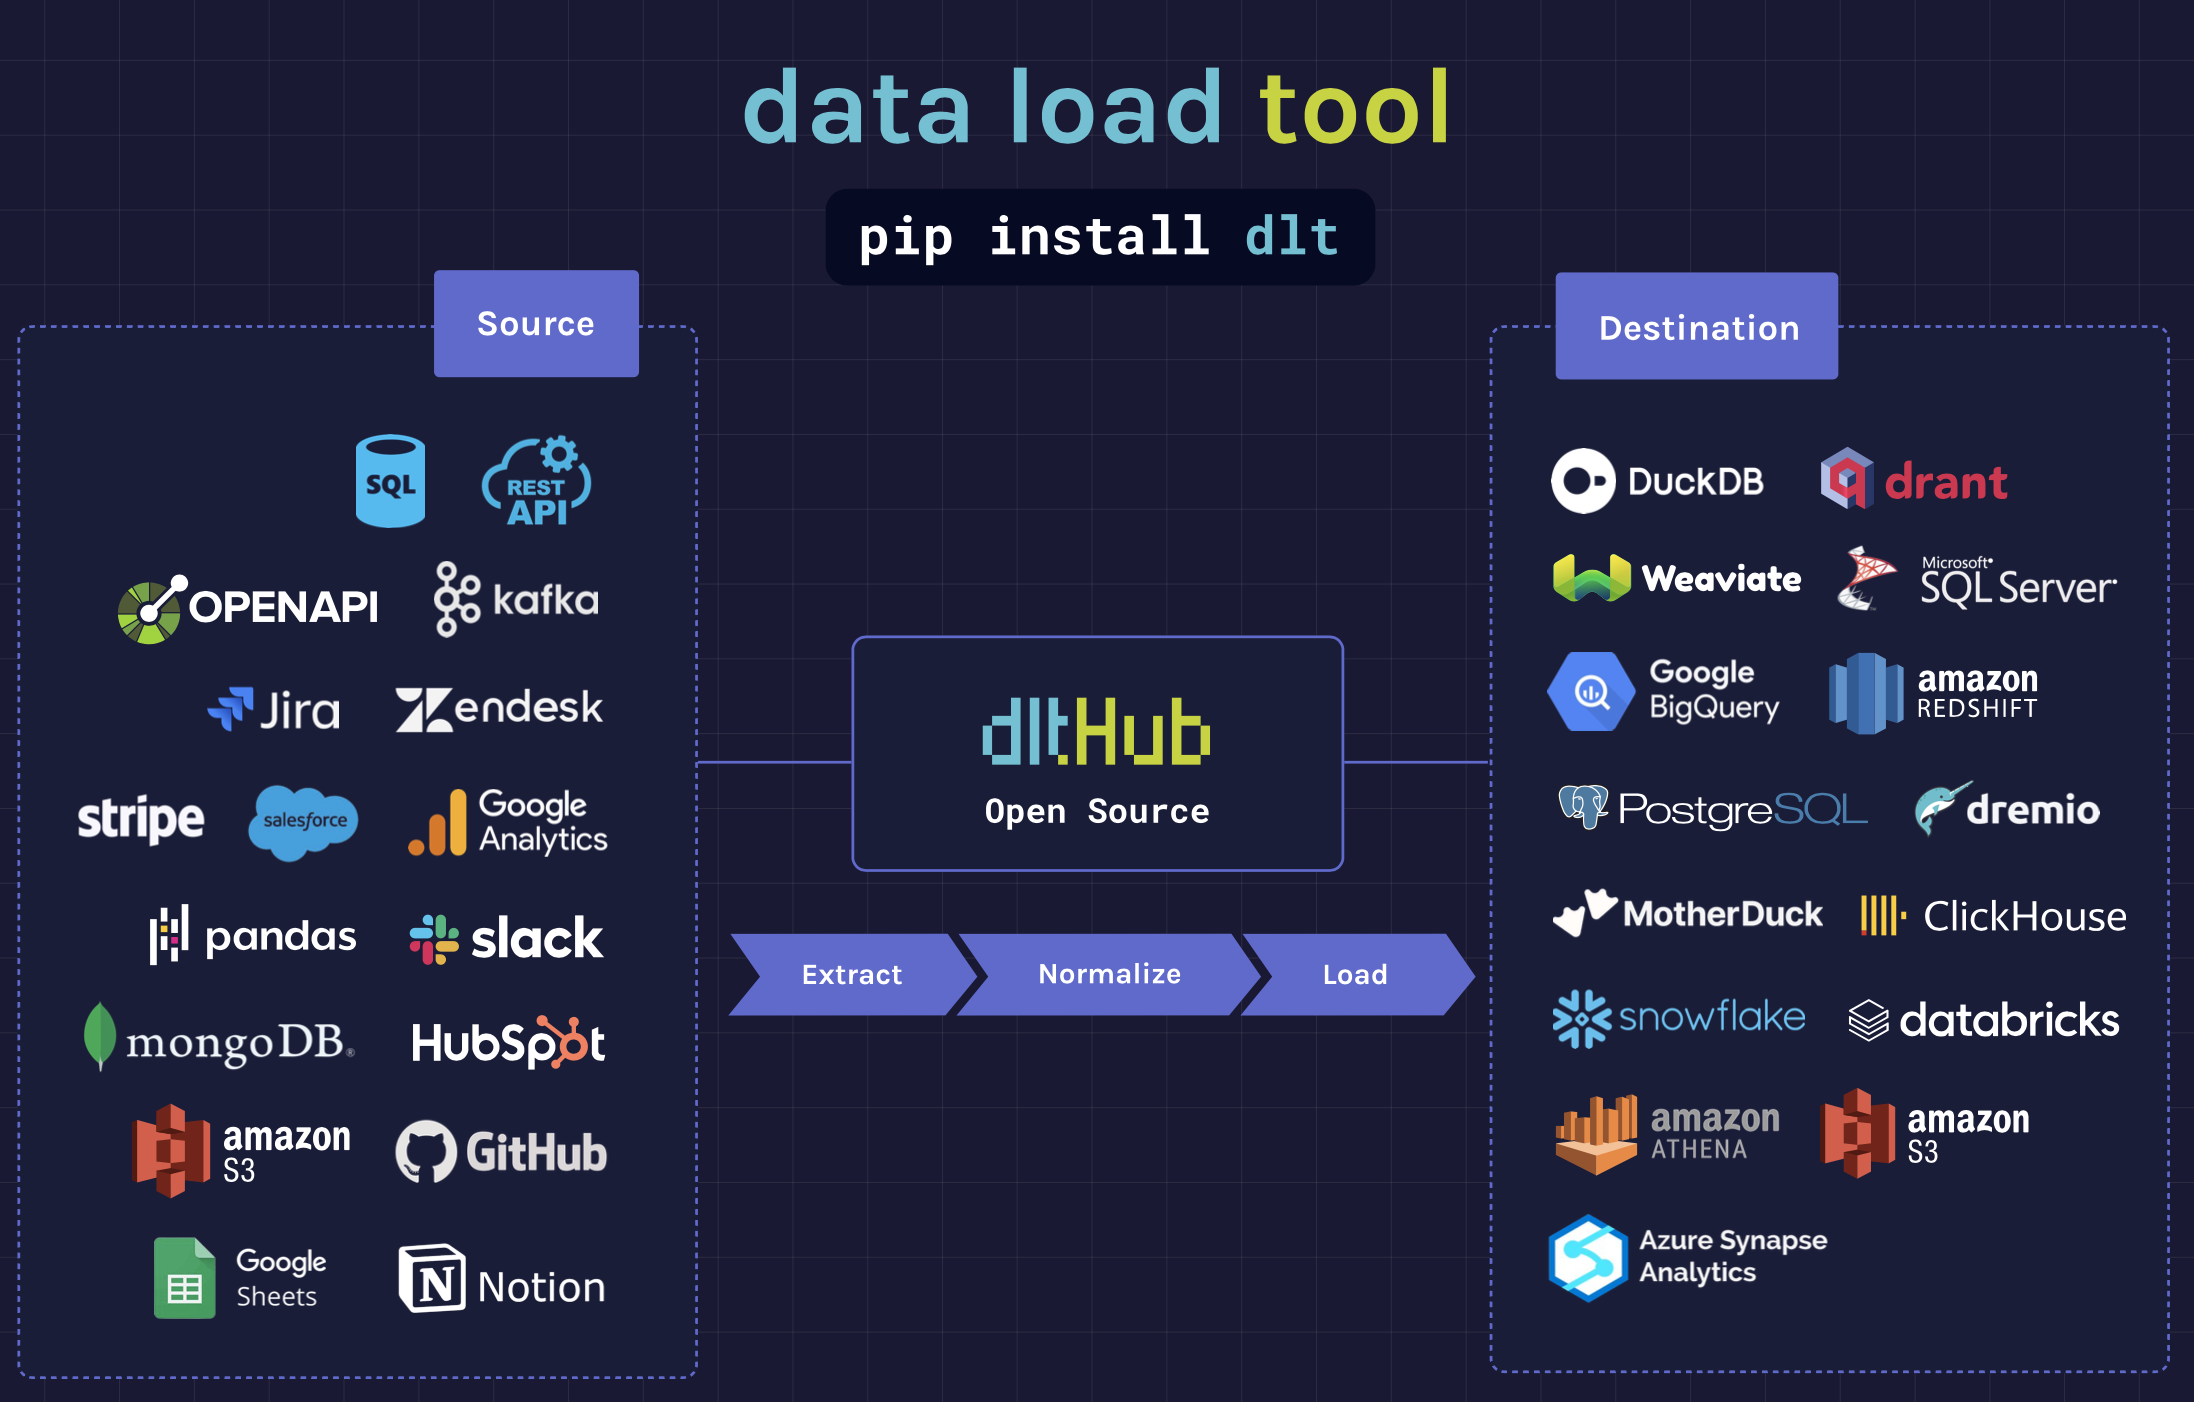

---
## **Installation**

> **Note**: We recommend working within a virtual environment when creating Python projects. This way, all the dependencies for your current project will be isolated from packages in other projects.

[Install](https://dlthub.com/docs/reference/installation) `dlt` with DuckDB as destination:

In [1]:
%%capture
!pip install "dlt[duckdb]"

Read more about DuckDB as a destination [here](https://dlthub.com/docs/dlt-ecosystem/destinations/duckdb).

---
##  **Run a simple pipeline with toy data**
For educational purposes, let’s start with a simple pipeline using a small dataset — Pokémon data represented as a list of Python dictionaries.

1. Define a list of Python dictionaries, which will be your toy data:

In [2]:
# Sample data containing pokemon details
data = [
    {"id": "1", "name": "bulbasaur", "size": {"weight": 6.9, "height": 0.7}},
    {"id": "4", "name": "charmander", "size": {"weight": 8.5, "height": 0.6}},
    {"id": "25", "name": "pikachu", "size": {"weight": 6, "height": 0.4}},
]

In [3]:
data

[{'id': '1', 'name': 'bulbasaur', 'size': {'weight': 6.9, 'height': 0.7}},
 {'id': '4', 'name': 'charmander', 'size': {'weight': 8.5, 'height': 0.6}},
 {'id': '25', 'name': 'pikachu', 'size': {'weight': 6, 'height': 0.4}}]

2. Import `dlt` and create a simple pipeline:

In [4]:
import dlt

# Set pipeline name, destination, and dataset name
pipeline = dlt.pipeline(
    pipeline_name="quick_start",
    destination="duckdb",
    dataset_name="mydata",
)

In [5]:
pipeline

3. Run your pipeline and print the load info:

In [6]:
# Run the pipeline with data and table name
load_info = pipeline.run(data, table_name="pokemon")

print(load_info)

Pipeline quick_start load step completed in 0.28 seconds
1 load package(s) were loaded to destination duckdb and into dataset mydata
The duckdb destination used duckdb:////content/quick_start.duckdb location to store data
Load package 1735099403.320908 is LOADED and contains no failed jobs


> **What just happened?**:  
> The first run of a pipeline will scan the data that goes through it and generate a schema. To convert nested data into a relational format, dlt flattens dictionaries and unpacks nested lists into sub-tables.
>
> For this example `dlt` created a schema called 'mydata' with the table 'pokemon' in it and stored it in DuckDB.
>
>For detailed instructions on running a pipeline, see the documentation [here](https://dlthub.com/docs/walkthroughs/run-a-pipeline).

Quick start was really quick, hah? It seems like some kind of magic happened.

We don't believe in magic! Let's start from the beginning, what is dlt Pipeline?

---

## **What is dlt Pipeline?**

A [pipeline](https://dlthub.com/docs/general-usage/pipeline) is a connection that moves data from your Python code to a destination. The pipeline accepts dlt sources or resources, as well as generators, async generators, lists, and any iterables. Once the pipeline runs, all resources are evaluated and the data is loaded at the destination.

In [7]:
pipeline = dlt.pipeline(
    pipeline_name="resource_source",
    destination="duckdb",
    dataset_name="mydata",
    dev_mode=True,
)

You instantiate a pipeline by calling the `dlt.pipeline` function with the following arguments:

* **`pipeline_name`**: This is the name you give to your pipeline. It helps you track and monitor your pipeline, and also helps to bring back its state and data structures for future runs. If you don't give a name, dlt will use the name of the Python file you're running as the pipeline name.
* **`destination`**: a name of the destination to which dlt will load the data. It may also be provided to the run method of the pipeline.
* **`dataset_name`**: This is the name of the group of tables (or dataset) where your data will be sent. You can think of a dataset like a folder that holds many files, or a schema in a relational database. You can also specify this later when you run or load the pipeline. If you don't provide a name, it will default to the name of your pipeline.
* **`dev_mode`**: If you set this to True, dlt will add a timestamp to your dataset name every time you create a pipeline. This means a new dataset will be created each time you create a pipeline.

There are more arguments, but they are for advanced use, we skip it for now.

---

## **Run method**

To load the data, you call the run method and pass your data in the data argument.

In [8]:
# Run the pipeline and print load info
load_info = pipeline.run(data, table_name="pokemon")
print(load_info)

Pipeline resource_source load step completed in 0.36 seconds
1 load package(s) were loaded to destination duckdb and into dataset mydata_20241225040324
The duckdb destination used duckdb:////content/resource_source.duckdb location to store data
Load package 1735099404.8690484 is LOADED and contains no failed jobs


Commonly used arguments:

* **`data`** (the first argument) may be a dlt source, resource, generator function, or any Iterator or Iterable (i.e., a list or the result of the map function).
* **`write_disposition`** controls how to write data to a table. Defaults to "append".
  * `append` will always add new data at the end of the table.
  * `replace` will replace existing data with new data.
  * `skip` will prevent data from loading.
  * `merge` will deduplicate and merge data based on `primary_key` and `merge_key` hints.
* **`table_name`**: specified in cases when the table name cannot be inferred, i.e., from the resources or name of the generator function.

 ---
 ## **Explore the loaded data**

---
### **(1) DuckDB Connection**

Start a connection to your database using native `duckdb` connection and look what tables were generated:

In [9]:
import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# A database '<pipeline_name>.duckdb' was created in working directory so just connect to it

# Connect to the DuckDB database
print(pipeline.pipeline_name)
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")


# Set search path to the dataset
print(pipeline.dataset_name)
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")

# Describe the dataset
conn.sql("DESCRIBE").df()

resource_source
mydata_20241225040324


,database,schema,name,column_names,column_types,temporary
0,resource_source,mydata_20241225040324,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,resource_source,mydata_20241225040324,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,resource_source,mydata_20241225040324,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,resource_source,mydata_20241225040324,pokemon,"[id, name, size__weight, size__height, _dlt_lo...","[VARCHAR, VARCHAR, DOUBLE, DOUBLE, VARCHAR, VA...",False


You can see:
-  `pokemon` table,

and 3 special `dlt` tables (we will discuss them later):
- `_dlt_loads`,
- `_dlt_pipeline_state`,
- `_dlt_version`.

Let's execute a query to get all data from the `pokemon` table:

In [10]:
# Fetch all data from 'pokemon' as a DataFrame
table = conn.sql("SELECT * FROM pokemon").df()

# Display the DataFrame
table

,id,name,size__weight,size__height,_dlt_load_id,_dlt_id
0,1,bulbasaur,6.9,0.7,1735099404.8690484,gtHBO7HVwqiBLA
1,4,charmander,8.5,0.6,1735099404.8690484,Sa8X2WMPyERWgg
2,25,pikachu,6.0,0.4,1735099404.8690484,qY2rveAJqx3syg


 ---
 ### **(2) `dlt`'s [sql_client](https://dlthub.com/docs/general-usage/dataset-access/sql-client)**

Most dlt destinations (even filesystem) use an implementation of the `SqlClientBase` class to connect to the physical destination to which your data is loaded. You can access the SQL client of your destination via the `sql_client` method on your pipeline.

Start a connection to your database with `pipeline.sql_client()` and execute a query to get all data from the `pokemon` table:

In [11]:
# Query data from 'pokemon' using the SQL client
with pipeline.sql_client() as client:
    with client.execute_query("SELECT * FROM pokemon") as cursor:
        data = cursor.df()

# Display the data
data

,id,name,size__weight,size__height,_dlt_load_id,_dlt_id
0,1,bulbasaur,6.9,0.7,1735099404.8690484,gtHBO7HVwqiBLA
1,4,charmander,8.5,0.6,1735099404.8690484,Sa8X2WMPyERWgg
2,25,pikachu,6.0,0.4,1735099404.8690484,qY2rveAJqx3syg


---
### **(3) dlt [datasets](https://dlthub.com/docs/general-usage/dataset-access/dataset)**

Here's an example of how to retrieve data from a pipeline and load it into a Pandas DataFrame or a PyArrow Table.

In [12]:
dataset = pipeline.dataset(dataset_type="default")
dataset.pokemon.df()

,id,name,size__weight,size__height,_dlt_load_id,_dlt_id
0,1,bulbasaur,6.9,0.7,1735099404.8690484,gtHBO7HVwqiBLA
1,4,charmander,8.5,0.6,1735099404.8690484,Sa8X2WMPyERWgg
2,25,pikachu,6.0,0.4,1735099404.8690484,qY2rveAJqx3syg


---
# **Exercise 1**

Using the code from the previous cell, fetch the data from the `pokemon` table into a dataframe and count the number of columns in the table `pokemon`.


**Use this number to answer the question in the Homework Google Form.**

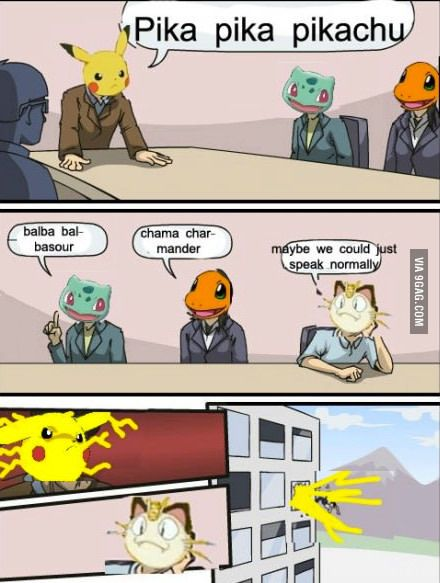

✅ ▶ Proceed to the [next lesson](https://colab.research.google.com/drive/1tc94GvIoYXmYrjUibDhY_9iPR5zA0Eyw?usp=sharing)!

In [20]:
# Query data from 'pokemon' using the SQL client
with pipeline.sql_client() as client:
    with client.execute_query("SELECT * FROM pokemon") as cursor:
        data = cursor.df()  # This fetches the data into a DataFrame

# Display the DataFrame (optional)
# print(data)

# Count the number of columns in the DataFrame
num_columns = len(data.columns)

# Print the number of columns
print(f"Number of columns in the 'pokemon' table: {num_columns}")

Number of columns in the 'pokemon' table: 6


In [18]:
dataset = pipeline.dataset(dataset_type="default")
len(dataset.pokemon.df().columns)

6